<a href="https://colab.research.google.com/github/justdelly/My-IE423-Tasks/blob/main/notebooks/hackhaton_sixth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <font color='#475468'> House Prices:</font>
### <font color='#475468'> Can you predict the rent prices?</font>

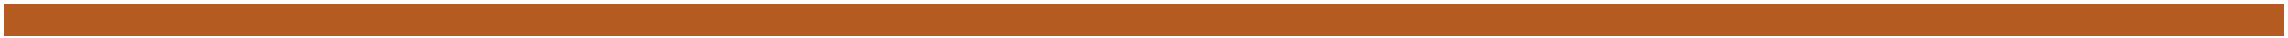

## Initialize

In [27]:
import pandas as pd
import numpy as np

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Load Data

In [100]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [175]:
dfMlb = pd.read_csv('/content/drive/MyDrive/Datasets/final_ankara3 (1).csv')


In [176]:
dfMlb.rename(columns={'Depozito': 'fiyat'}, inplace=True)

In [177]:
dfMlb['Cephe'] = dfMlb.groupby('Mahalle')['Cephe'].transform(lambda x: x.fillna(x.mode()[0] if not x.mode().empty else 'unknown'))


In [178]:
# prompt: drop the rows that have missing values for Banyo Sayısı

dfMlb.dropna(subset=['Banyo Sayısı'], inplace=True)


In [179]:
# prompt: drop the column İlan no

dfMlb = dfMlb.drop('İlan no', axis=1)


In [180]:
dfMlb = dfMlb.drop('Mahalle', axis=1)

In [181]:
dfMlb.head()

,fiyat,Cephe,Banyo Sayısı,Kullanım Durumu,Kat Sayısı,Bina Yaşı,Isınma Tipi,Site İçerisinde,Aidat,Yapı Tipi,Ilce,Yapının Durumu,Eşya Durumu,Oda + Salon Sayısı,Bulunduğu Kat
0,35000.0,"Güney, Batı",1.0,Boş,6,10,Merkezi (Pay Ölçer),1,1700.000000,Betonarme,Yenimahalle,İkinci El,Eşyalı Değil,2 + 1,Villa Katı
1,20000.0,Doğu,1.0,Boş,5,0,Kombi,1,891.847311,Betonarme,Çankaya,İkinci El,Eşyalı,1 + 1,5. Kat
2,20000.0,Güney,1.0,Boş,4,0,Kombi,1,891.847311,Betonarme,Çankaya,İkinci El,Eşyalı,1 + 1,2. Kat
3,25000.0,Batı,1.0,Boş,4,35,Merkezi,1,2000.000000,Betonarme,Çankaya,İkinci El,Eşyalı Değil,3 + 1,3. Kat
4,25000.0,Batı,1.0,Boş,4,30,Merkezi,1,2000.000000,Betonarme,Çankaya,İkinci El,Eşyalı Değil,3 + 1,3. Kat


In [182]:
# prompt: how many missing values for each column

dfMlb.isnull().sum()
dfMlb = dfMlb.drop_duplicates()


In [183]:
# prompt: how many unique values for each column

for col in dfMlb.columns:
  print(col, dfMlb[col].nunique())


fiyat 261
Cephe 16
Banyo Sayısı 7
Kullanım Durumu 4
Kat Sayısı 43
Bina Yaşı 55
Isınma Tipi 12
Site İçerisinde 1
Aidat 229
Yapı Tipi 7
Ilce 17
Yapının Durumu 4
Eşya Durumu 2
Oda + Salon Sayısı 23
Bulunduğu Kat 36


# Exploratory Data Analysis

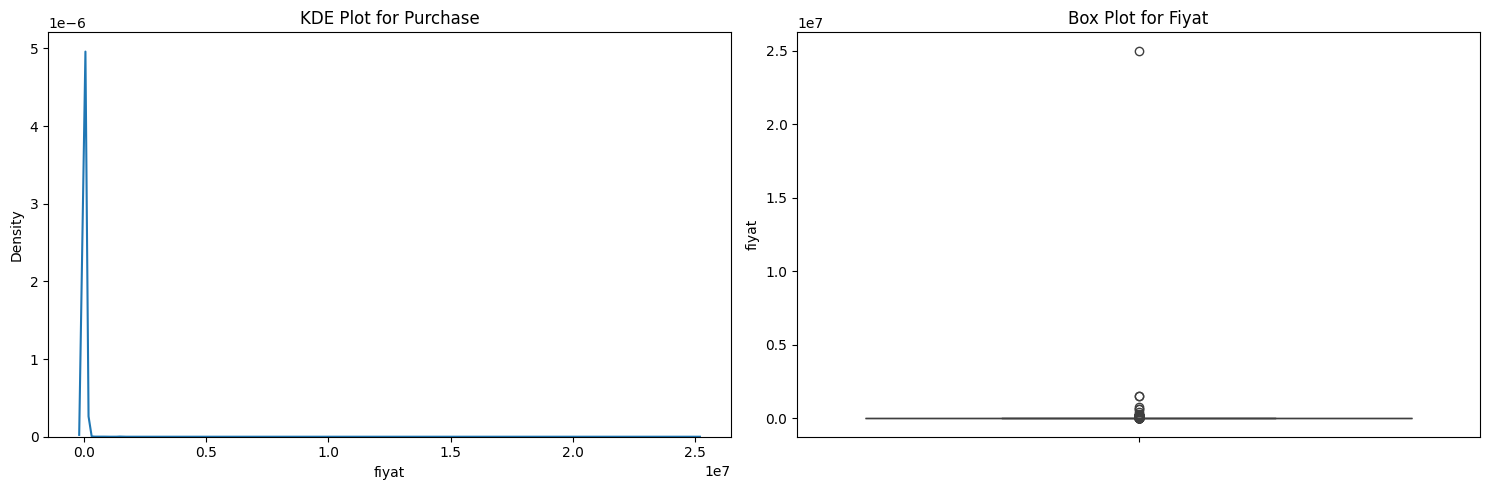

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 5))

plt.subplot(121)  # Subplot 1: KDE plot
sns.kdeplot(data=dfMlb['fiyat'])
plt.title('KDE Plot for Purchase')

plt.subplot(122)  # Subplot 2: Box plot
sns.boxplot(data=dfMlb['fiyat'])
plt.title('Box Plot for Fiyat')

plt.tight_layout()  # Automatically adjust subplot parameters for better layout
plt.show()

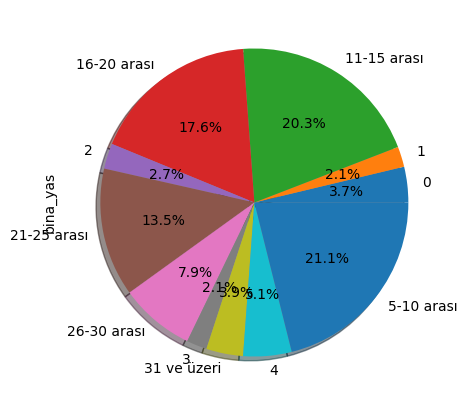

In [ ]:
dfMlb.groupby('bina_yas').agg({'bina_yas':'count'}).bina_yas.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

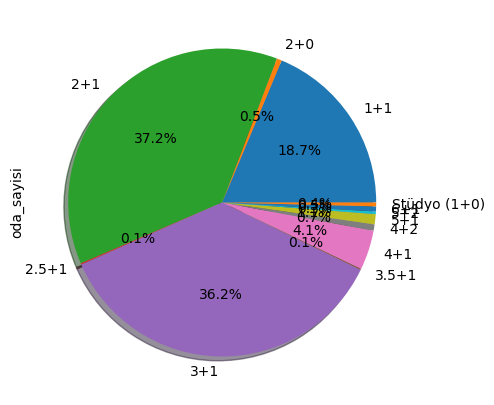

In [ ]:
dfMlb.groupby('oda_sayisi').agg({'oda_sayisi':'count'}).oda_sayisi.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

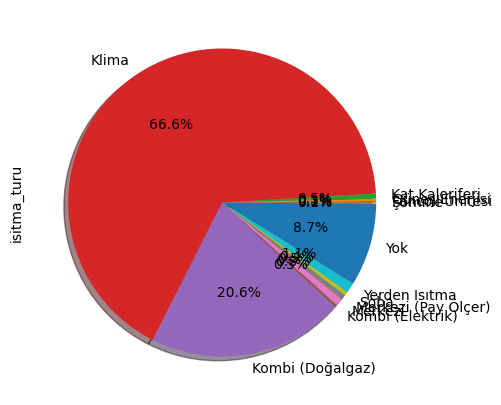

In [ ]:
dfMlb.groupby('isitma_turu').agg({'isitma_turu':'count'}).isitma_turu.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

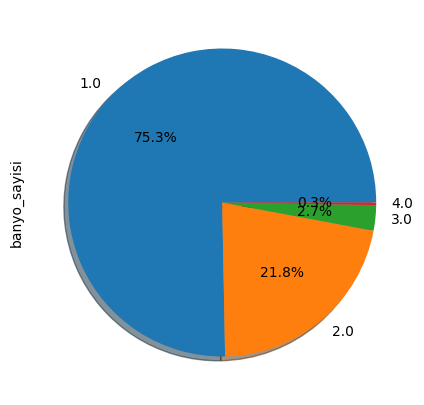

In [ ]:
dfMlb.groupby('banyo_sayisi').agg({'banyo_sayisi':'count'}).banyo_sayisi.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

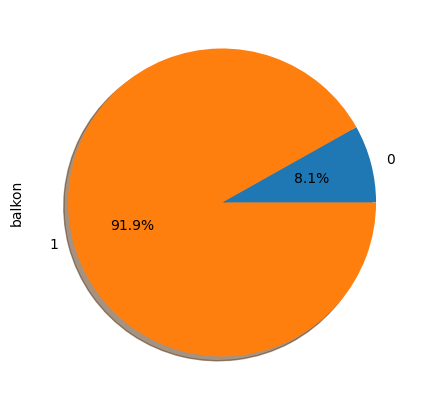

In [ ]:
dfMlb.groupby('balkon').agg({'balkon':'count'}).balkon.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

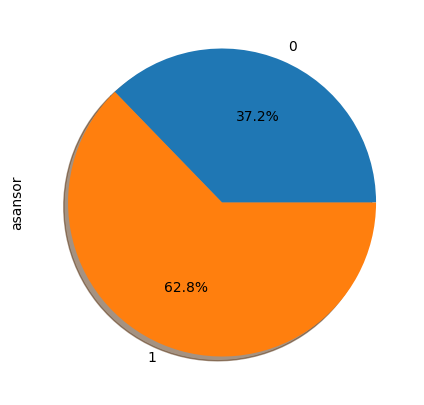

In [ ]:
dfMlb.groupby('asansor').agg({'asansor':'count'}).asansor.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

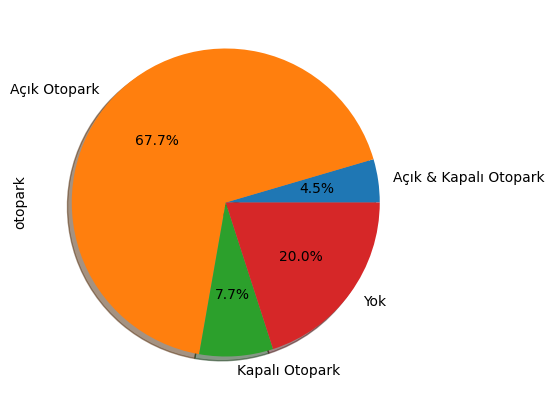

In [ ]:
dfMlb.groupby('otopark').agg({'otopark':'count'}).otopark.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

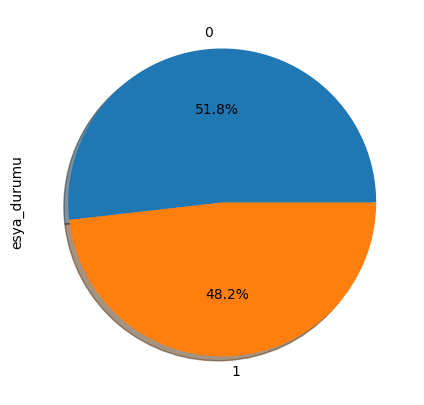

In [ ]:
dfMlb.groupby('esya_durumu').agg({'esya_durumu':'count'}).esya_durumu.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

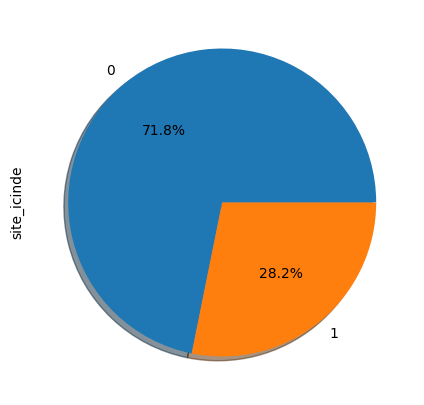

In [ ]:
dfMlb.groupby('site_icinde').agg({'site_icinde':'count'}).site_icinde.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

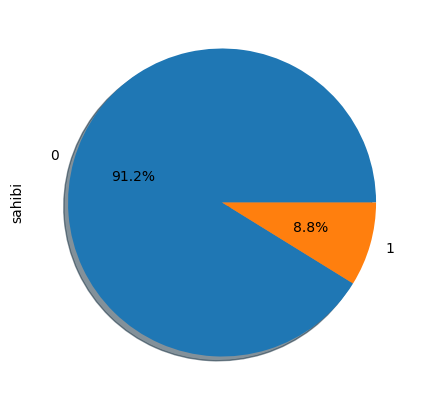

In [ ]:
dfMlb.groupby('sahibi').agg({'sahibi':'count'}).sahibi.plot(kind='pie',autopct='%1.1f%%',figsize=(5,5),shadow=True)
plt.show()

In [ ]:
p_id=dfMlb.value_counts('oda_sayisi').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

KeyError: 'oda_sayisi'

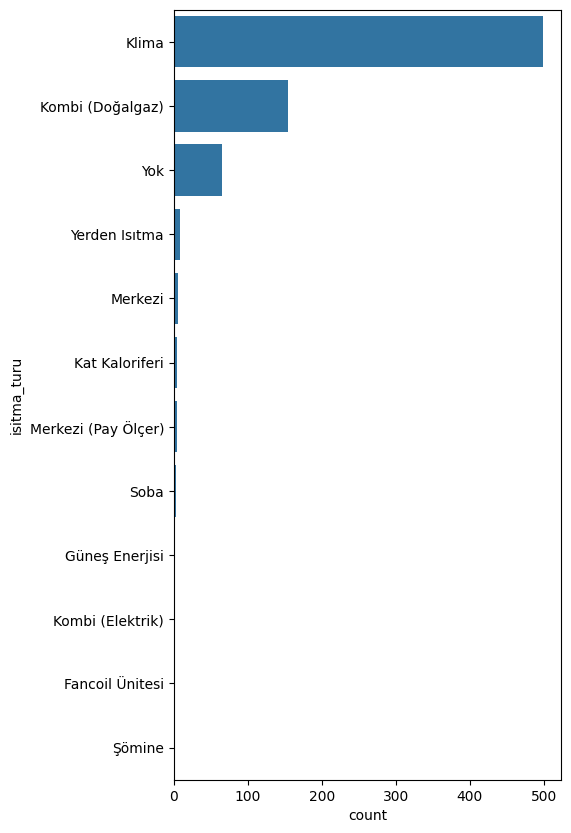

In [ ]:
p_id=dfMlb.value_counts('isitma_turu').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

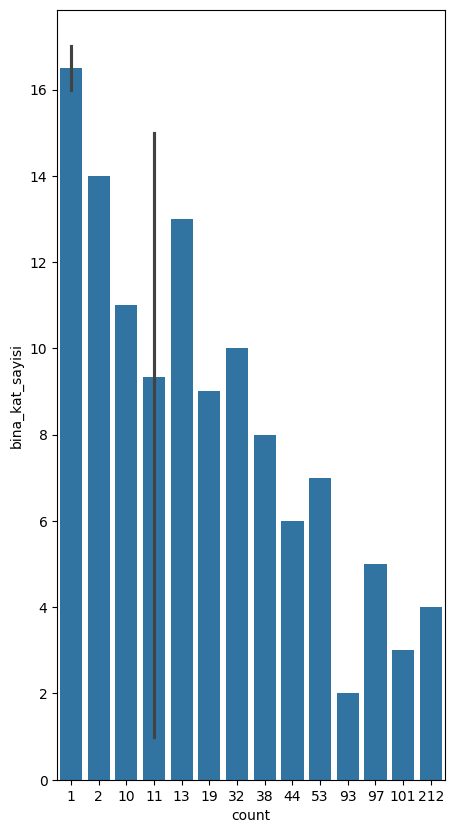

In [ ]:
p_id=dfMlb.value_counts('bina_kat_sayisi').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

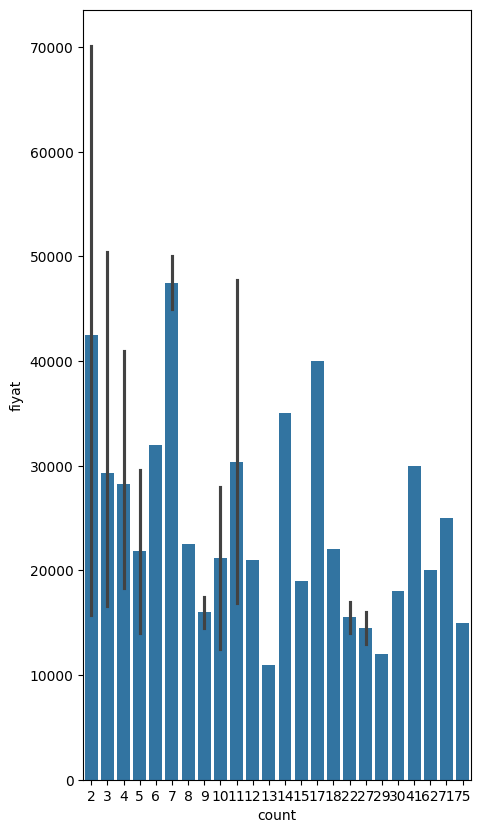

In [ ]:
p_id=dfMlb.value_counts('fiyat').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

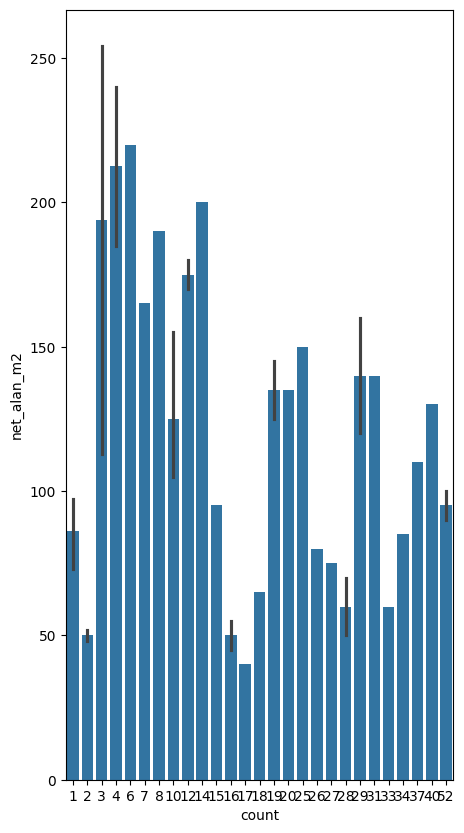

In [ ]:
p_id=dfMlb.value_counts('net_alan_m2').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

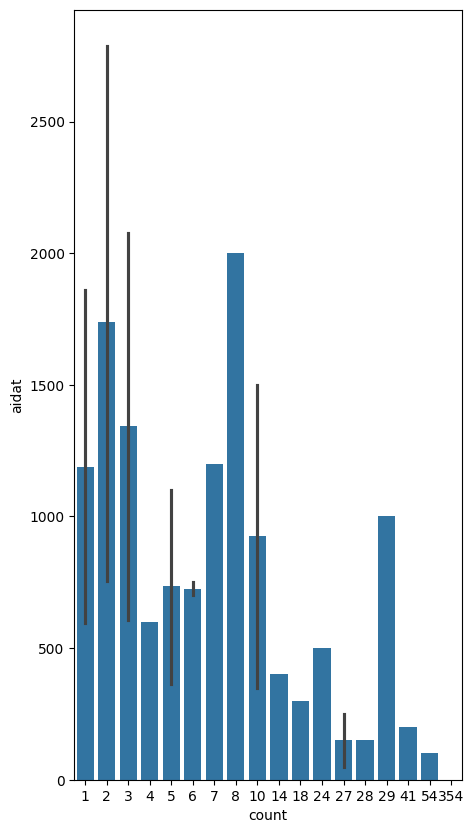

In [ ]:
p_id=dfMlb.value_counts('aidat').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

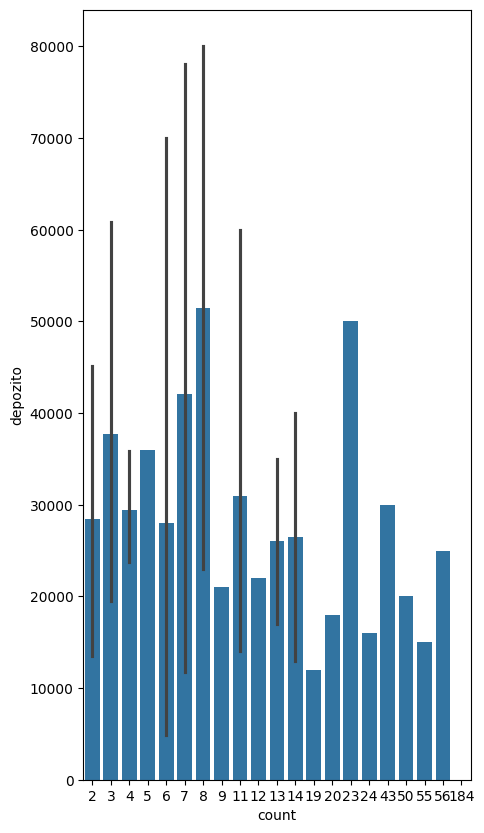

In [ ]:
p_id=dfMlb.value_counts('depozito').sort_values(ascending=False).head(50)
plt.figure(figsize=(5,10))
sns.barplot(y=p_id.index,x=p_id)
plt.show()

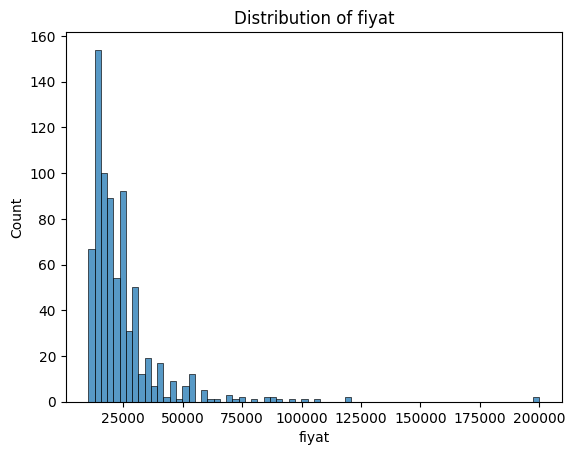

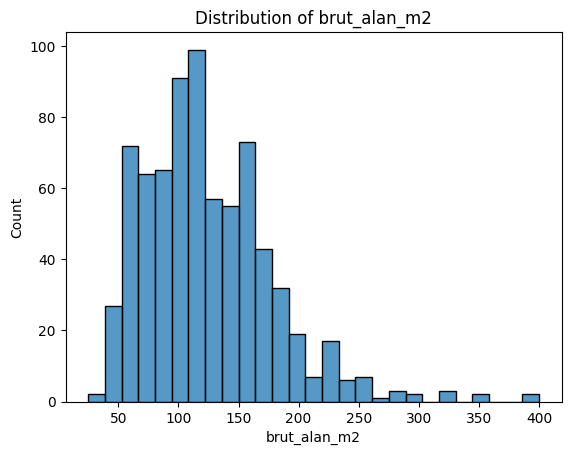

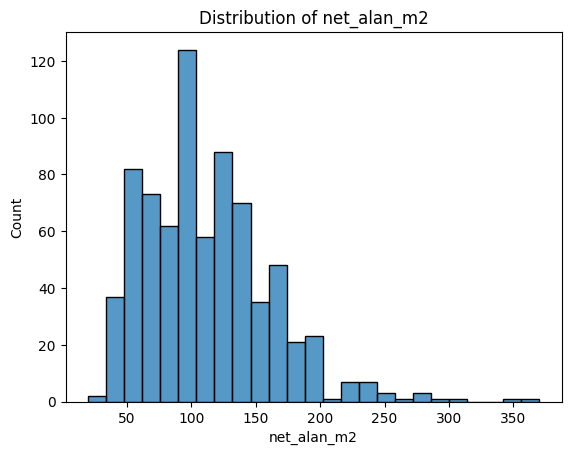

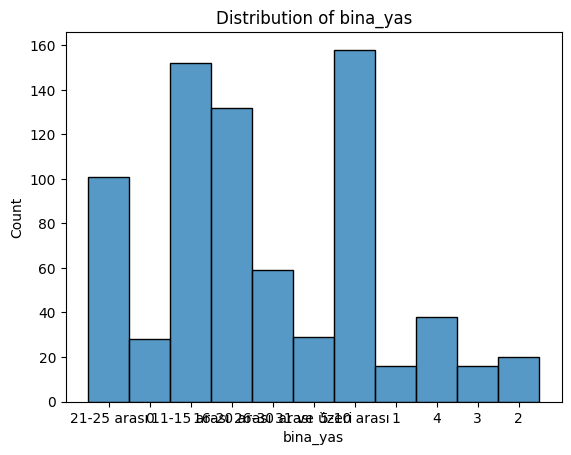

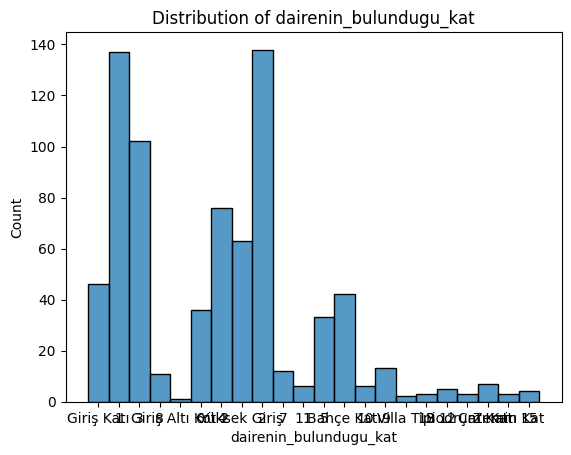

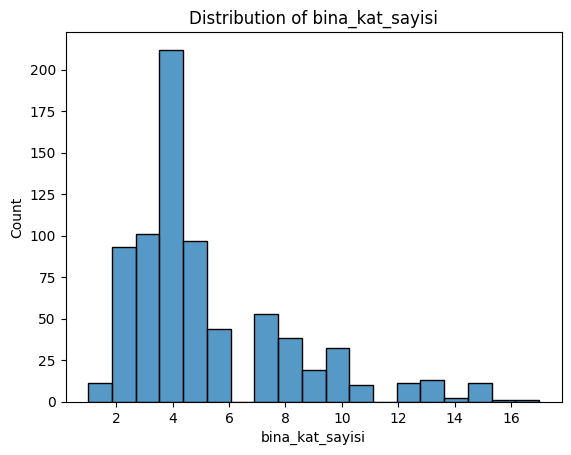

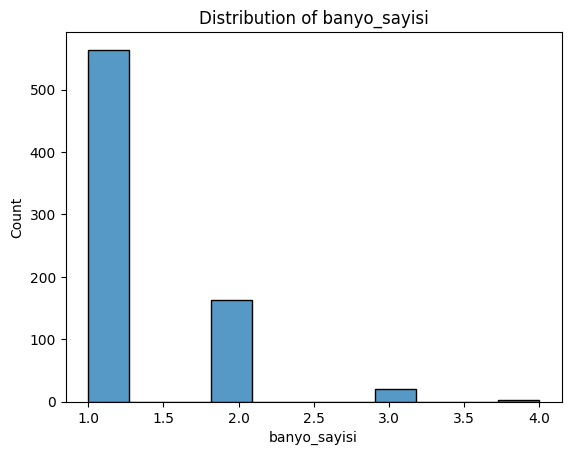

In [ ]:
for col in ['fiyat', 'brut_alan_m2', 'net_alan_m2', 'bina_yas', 'dairenin_bulundugu_kat', 'bina_kat_sayisi', 'banyo_sayisi']:
        sns.histplot(dfMlb[col])
        plt.title(f'Distribution of {col}')
        plt.show()

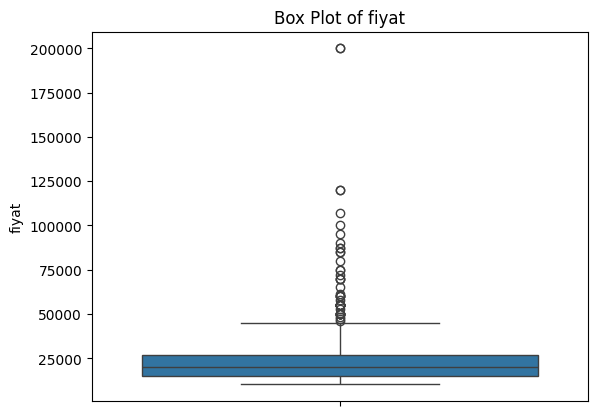

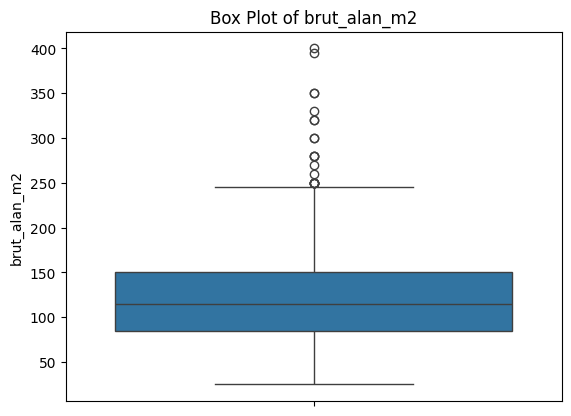

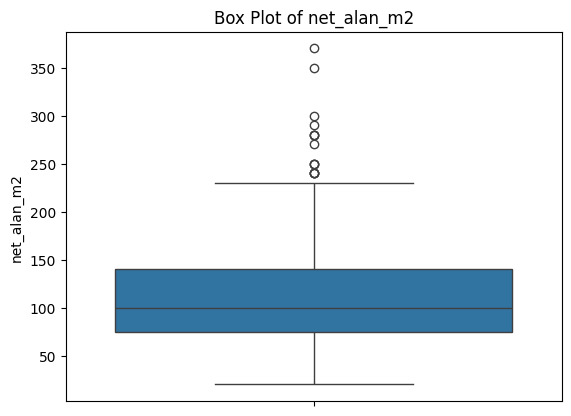

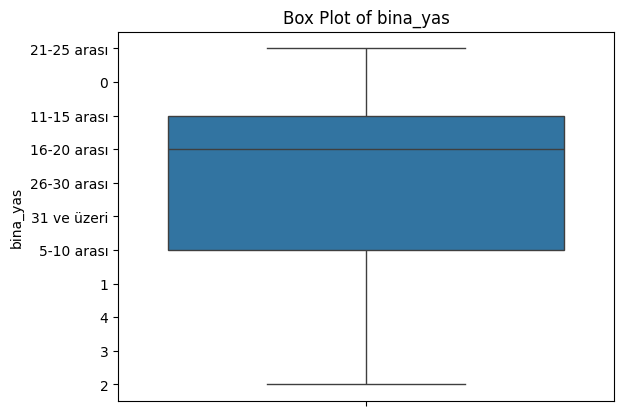

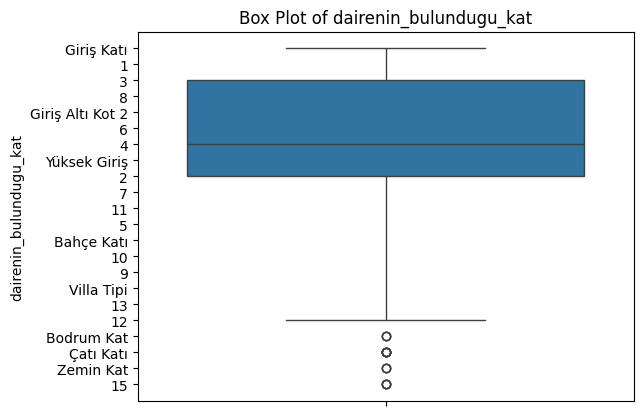

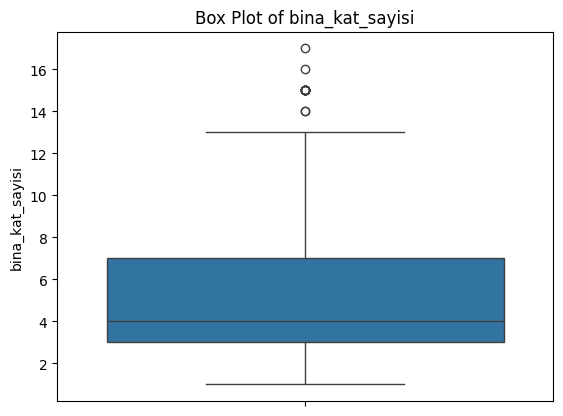

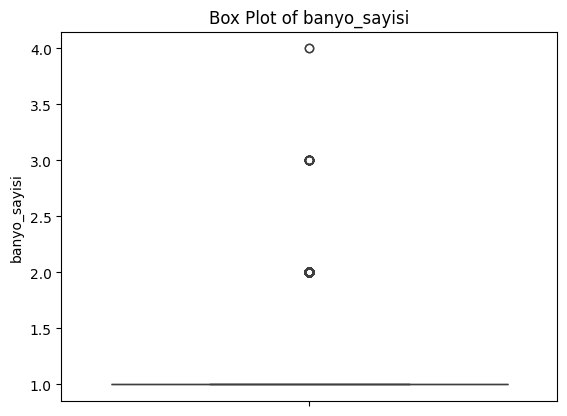

In [ ]:
for col in ['fiyat', 'brut_alan_m2', 'net_alan_m2', 'bina_yas', 'dairenin_bulundugu_kat', 'bina_kat_sayisi', 'banyo_sayisi']:
        sns.boxplot(dfMlb[col])
        plt.title(f'Box Plot of {col}')
        plt.show()

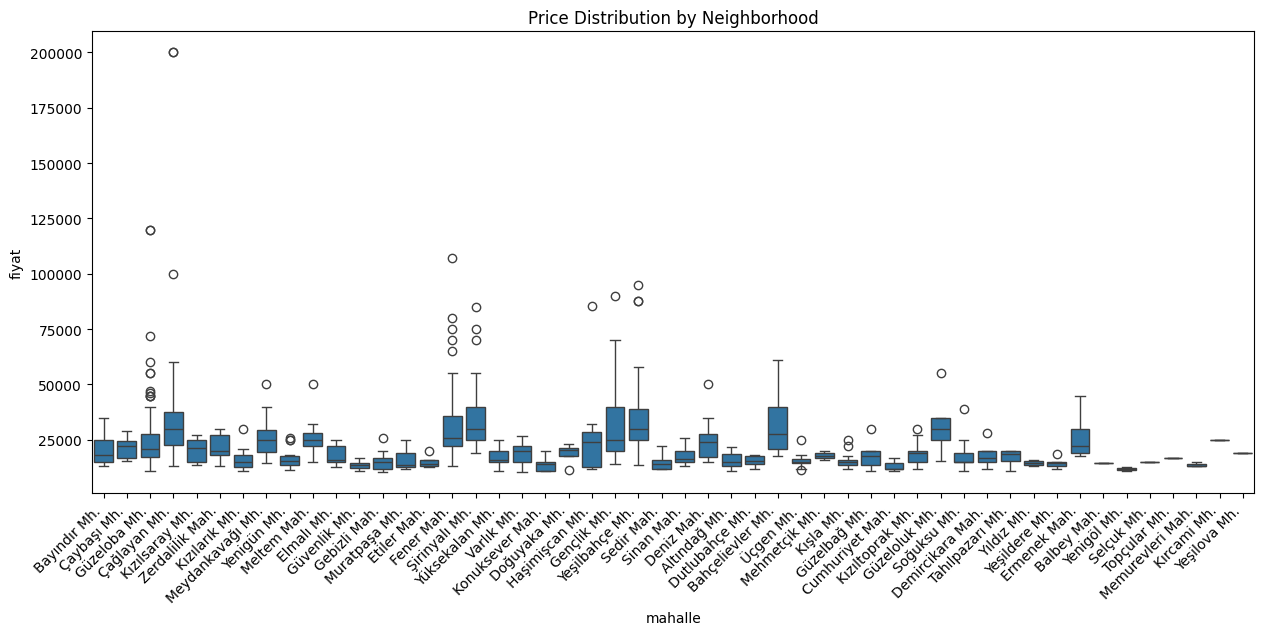

In [ ]:
plt.figure(figsize=(15, 6))  # Adjust width (15) as needed
sns.boxplot(x='mahalle', y='fiyat', data=dfMlb)
plt.title('Price Distribution by Neighborhood')
plt.xticks(rotation=45, ha='right')
plt.show()

# Data Preprocessing

In [184]:
# prompt: Why X_test and y_test have different number of rows fix that

# Select target as a series and features as dataframe
y = dfMlb.loc[:,['fiyat']].values.ravel()
X = dfMlb.drop(['fiyat'],axis=1)

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.8, test_size=0.2,random_state=1)
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)


Shape of X_train: (3020, 14)
Shape of X_test: (755, 14)
Shape of y_train: (3020,)
Shape of y_test: (755,)
Shape of X: (3775, 14)
Shape of y: (3775,)


In [185]:
# Select categorical features
cols_cat = [col for col in X.columns if X[col].dtype == 'object' and X[col].nunique()<1000]
cols_cat

['Cephe',
 'Kullanım Durumu',
 'Isınma Tipi',
 'Yapı Tipi',
 'Ilce',
 'Yapının Durumu',
 'Eşya Durumu',
 'Oda + Salon Sayısı',
 'Bulunduğu Kat']

In [187]:
for col in cols_cat:
    valid_values = set(X_train[col].unique())
    invalid_indices = ~X_test[col].isin(valid_values)
    X_test.drop(X_test[invalid_indices].index, inplace=True)
    y_test = y_test[~invalid_indices] # Use boolean indexing to filter NumPy array

In [188]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X_train: (3020, 14)
Shape of X_test: (754, 14)
Shape of y_train: (3020,)
Shape of y_test: (754,)
Shape of X: (3775, 14)
Shape of y: (3775,)


In [189]:
# Label encoding on only categorical features

from sklearn.preprocessing import LabelEncoder

Xle_train = X_train.copy()
Xle_test = X_test.copy()
# Apply label encoder to each column with categorical data
label_encoder = LabelEncoder()
for col in cols_cat:
    Xle_train[col] = label_encoder.fit_transform(X_train[col])
    Xle_test[col] = label_encoder.transform(X_test[col])

In [190]:
print("Shape of Xle_test:", Xle_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of Xle_test: (754, 14)
Shape of y_test: (754,)


In [191]:
# Select numeric features
cols_num = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]

# Supervised Learning

In [192]:
y.mean()

34618.239205298014

The mean of the rent prices are 33133

# Decision Tree

In [193]:
import sklearn
from sklearn.tree import DecisionTreeRegressor

mdlDtrMlb = DecisionTreeRegressor(random_state=1)

In [194]:
mdlDtrMlb.fit(Xle_train[cols_num + cols_cat], y_train)

DecisionTreeRegressor(random_state=1)

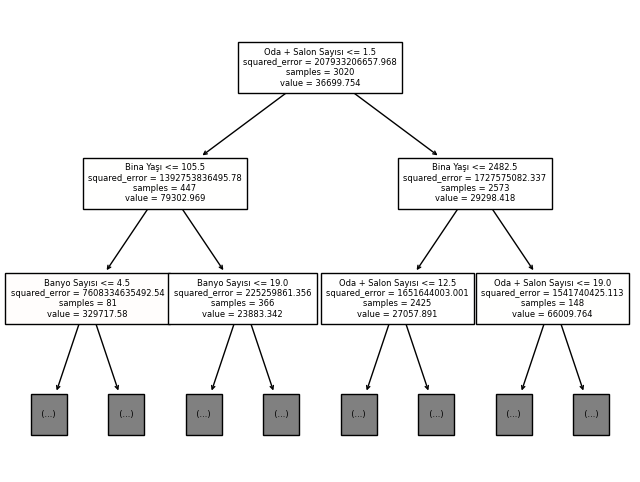

In [195]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=100)
plot_tree(mdlDtrMlb, max_depth=2, feature_names=X.columns, fontsize= 6, filled=True)
plt.show()

In [196]:
print('First few houses:')
print(Xle_train[cols_num + cols_cat].head())
print('Price predictions:')
print(mdlDtrMlb.predict(Xle_train[cols_num + cols_cat].head()))

First few houses:
      Banyo Sayısı  Kat Sayısı  Bina Yaşı  Site İçerisinde   Aidat  Cephe  \
236            2.0           8         18                1  1050.0      5   
339            1.0           3         13                1   100.0     14   
3093           1.0          13          9                1   745.0      5   
366            2.0           7         15                1  4200.0      8   
4628           1.0           4         20                1   100.0      6   

      Kullanım Durumu  Isınma Tipi  Yapı Tipi  Ilce  Yapının Durumu  \
236                 1            6          1    14               3   
339                 1            6          1     9               3   
3093                1            6          1    13               3   
366                 1            7          1    14               3   
4628                1            6          2    14               3   

      Eşya Durumu  Oda + Salon Sayısı  Bulunduğu Kat  
236             1                   8

In [197]:
from sklearn.metrics import mean_absolute_error
y_pred = mdlDtrMlb.predict(Xle_test[cols_num + cols_cat])
print('MAE:')
print(mean_absolute_error(y_test,y_pred))

MAE:
48840.468169761276


In [198]:
def get_mae(mx_lf_nds, X_trn, X_tst, y_trn, y_tst):

    mdlDtrMlbDpt = DecisionTreeRegressor(max_leaf_nodes=mx_lf_nds, random_state=1)

    mdlDtrMlbDpt.fit(X_trn,y_trn)

    y_tst_prd = mdlDtrMlbDpt.predict(X_tst)

    mae = mean_absolute_error(y_tst, y_tst_prd)

    return(mae)

In [199]:

for i in [5, 50, 500, 50000]:
  mae = get_mae(i, Xle_train[cols_num + cols_cat], Xle_test[cols_num + cols_cat], y_train, y_test)
  print('Max leaf nodes: ',i, '\t Mean Absolute Error: ',mae)

Max leaf nodes:  5 	 Mean Absolute Error:  29877.155783431193
Max leaf nodes:  50 	 Mean Absolute Error:  81402.56894895053
Max leaf nodes:  500 	 Mean Absolute Error:  81517.40966283207
Max leaf nodes:  50000 	 Mean Absolute Error:  82434.03580901856


## Random Forest

In [200]:
from sklearn.ensemble import RandomForestRegressor

# Function for building and scoring Random Forest models
def get_random_forest_mae(X_trn, X_tst, y_trn, y_tst):
    mdlRfsMlb = RandomForestRegressor(random_state=1)
    mdlRfsMlb.fit(X_trn, y_trn)
    y_tst_prd = mdlRfsMlb.predict(X_tst)
    mae = mean_absolute_error(y_tst, y_tst_prd)
    return (mae)

In [201]:
# Encode and Build/Score using all  columns

mae = get_random_forest_mae(Xle_train[cols_num + cols_cat], Xle_test[cols_num + cols_cat], y_train, y_test)
print("MAE from all  columns:")
print(mae)

MAE from all  columns:
53063.189223664274


## Gradient Boosted Tree

In [202]:
from xgboost import XGBRegressor

#Build and score default Gradient Boosting Model
mdlXgbMlb = XGBRegressor()
mdlXgbMlb.fit(Xle_train[cols_num + cols_cat], y_train)
y_test_pred = mdlXgbMlb.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from default XGBoost model:")
print(mae)

MAE from default XGBoost model:
77131.08223345931


In [204]:
#Build and score a tuned Gradient Boosting Model
mdlXgbMlb = XGBRegressor(n_estimators=5000, learning_rate=0.01, max_depth=5)
mdlXgbMlb.fit(Xle_train[cols_num + cols_cat], y_train)
y_test_pred = mdlXgbMlb.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from tuned XGBoost model:")
print(mae)

MAE from tuned XGBoost model:
77955.52126289994


In [129]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_absolute_error

# Define the parameter grid to search over
param_grid = {
    'n_estimators': [3000, 5000, 7000],  # Number of trees
    'learning_rate': [0.01, 0.1, 0.3],  # Step size shrinkage
    'max_depth': [3, 5, 7]  # Maximum depth of each tree
}

# Create an XGBoost regressor object
xgb_model = xgb.XGBRegressor()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='neg_mean_absolute_error', cv=5, verbose=2)

# Fit the grid search to the training data
grid_search.fit(Xle_train[cols_num + cols_cat], y_train)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

# Make predictions using the best model
y_test_pred = best_model.predict(Xle_test[cols_num + cols_cat])

# Calculate the mean absolute error
mae = mean_absolute_error(y_test_pred, y_test)

print("MAE from tuned XGBoost model:")
print(mae)

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=3000; total time=   1.6s
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=3000; total time=   1.6s
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=3000; total time=   1.5s
[CV] END .learning_rate=0.01, max_depth=3, n_estimators=3000; total time=   1.5s


KeyboardInterrupt: 

# CATBoost

In [130]:
!pip install catboost==1.2.2

In [131]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

In [205]:
model = CatBoostRegressor(iterations=100, learning_rate=0.1, depth=6, loss_function='RMSE')

param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}


In [206]:
# Assuming 'X' is your feature data and 'y' is your target variable
model.fit(Xle_train[cols_num + cols_cat], y_train)

0:	learn: 444654.3671916	total: 1.67ms	remaining: 165ms
1:	learn: 441616.5395216	total: 3.62ms	remaining: 177ms
2:	learn: 430639.9567887	total: 6.98ms	remaining: 226ms
3:	learn: 419931.9254572	total: 10.4ms	remaining: 249ms
4:	learn: 413104.0232918	total: 13.8ms	remaining: 263ms
5:	learn: 402854.1090100	total: 17.2ms	remaining: 269ms
6:	learn: 392857.7351627	total: 20.6ms	remaining: 273ms
7:	learn: 385408.4498579	total: 23.9ms	remaining: 274ms
8:	learn: 381588.4833951	total: 28.5ms	remaining: 289ms
9:	learn: 372145.4212704	total: 32.5ms	remaining: 293ms
10:	learn: 366135.2013253	total: 35.8ms	remaining: 290ms
11:	learn: 357084.8347234	total: 38.8ms	remaining: 284ms
12:	learn: 350350.8195141	total: 42.4ms	remaining: 284ms
13:	learn: 341707.8014942	total: 46.3ms	remaining: 284ms
14:	learn: 333282.5798848	total: 50.4ms	remaining: 286ms
15:	learn: 325066.9548525	total: 54.2ms	remaining: 284ms
16:	learn: 319785.5792827	total: 57.9ms	remaining: 283ms
17:	learn: 311916.5946896	total: 61.7ms	r

In [207]:
# Assuming 'model' is your trained CatBoostRegressor
y_pred = model.predict(Xle_test[cols_num + cols_cat])

In [208]:
from sklearn.metrics import mean_absolute_error as mae # Import the mean_absolute_error function and alias it as 'mae'

mae_value = mae(y_test, y_pred)
print("MAE:", mae_value)

MAE: 48402.65617892061


Hyperparamter Tuning of CATboost

In [209]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

In [210]:
model = CatBoostRegressor()

# Define the hyperparameter grid to search over
param_grid = {
    'iterations': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'depth': [4, 6, 8],
    'l2_leaf_reg': [1, 3, 5]
}

In [211]:
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')
# cv is the number of cross-validation folds, scoring metric is negative MAE for minimization

In [212]:
grid_search.fit(Xle_train[cols_num + cols_cat], y_train)  # Assuming you have your data prepared

Görüntülenen çıkış son 5000 satıra kısaltıldı.
45:	learn: 473159.8916436	total: 124ms	remaining: 10.8ms
46:	learn: 472375.1331204	total: 127ms	remaining: 8.09ms
47:	learn: 471590.8563387	total: 129ms	remaining: 5.39ms
48:	learn: 470808.8760906	total: 132ms	remaining: 2.69ms
49:	learn: 470027.9208696	total: 134ms	remaining: 0us
0:	learn: 38646.3957270	total: 2.36ms	remaining: 116ms
1:	learn: 38614.5186509	total: 5.06ms	remaining: 121ms
2:	learn: 38578.5107919	total: 7.7ms	remaining: 121ms
3:	learn: 38540.9962211	total: 10.2ms	remaining: 117ms
4:	learn: 38508.2829843	total: 12.7ms	remaining: 114ms
5:	learn: 38475.5618915	total: 15.2ms	remaining: 111ms
6:	learn: 38438.8995983	total: 17.7ms	remaining: 109ms
7:	learn: 38402.4088750	total: 20.3ms	remaining: 107ms
8:	learn: 38370.6978858	total: 22.7ms	remaining: 104ms
9:	learn: 38337.1090580	total: 25.3ms	remaining: 101ms
10:	learn: 38302.6674411	total: 26.7ms	remaining: 94.6ms
11:	learn: 38267.8559003	total: 29.2ms	remaining: 92.3ms
12:	lear

KeyboardInterrupt: 

In [140]:
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'depth': 8, 'iterations': 200, 'l2_leaf_reg': 5, 'learning_rate': 0.01}


In [141]:
from sklearn.metrics import mean_absolute_error as mae

y_pred = best_model.predict(Xle_test[cols_num + cols_cat])
mae_value = mae(y_test, y_pred)
print("MAE on Test Set:", mae_value)

MAE on Test Set: 16974.838428673647


# Support Vector Regression

In [213]:
from sklearn.svm import SVR

In [214]:
model = SVR(kernel='linear')  # Choose an appropriate kernel
model.fit(Xle_train[cols_num + cols_cat], y_train)

SVR(kernel='linear')

In [215]:
y_pred = model.predict(Xle_test[cols_num + cols_cat])

In [216]:
mae_value = mae(y_test, y_pred)
print("MAE on Test Set:", mae_value)

MAE on Test Set: 9479.559271240156


# Ridge Regression

In [217]:
from sklearn.linear_model import Ridge

In [218]:
model = Ridge(alpha=1.0)  # Adjust alpha (regularization strength) as needed
model.fit(Xle_train[cols_num + cols_cat], y_train)

Ridge()

In [219]:
y_pred = model.predict(Xle_test[cols_num + cols_cat])

In [220]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 22951.696309995696


# Lasso Regression

In [150]:
from sklearn.linear_model import Lasso

In [151]:
model = Lasso(alpha=1.0)  # Adjust alpha (regularization strength) as needed
model.fit(Xle_train[cols_num + cols_cat], y_train)

Lasso()

In [155]:
y_pred = model.predict(Xle_test[cols_num + cols_cat])

In [156]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 21169.585498107954


In [157]:
from sklearn.model_selection import GridSearchCV

In [158]:
param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [159]:
grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

In [160]:
grid_search.fit(Xle_train[cols_num + cols_cat], y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
             scoring='neg_mean_absolute_error')

In [161]:
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_
print("Best Parameters:", best_params)

Best Parameters: {'alpha': 100}


In [162]:
y_pred = best_estimator.predict(Xle_test[cols_num + cols_cat])
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error with Best Estimator:", mae)

Mean Absolute Error with Best Estimator: 21045.735446896317


# Neural Network Regression


In [169]:
from sklearn.linear_model import ElasticNet

# Create an ElasticNet model
model = ElasticNet(alpha=0.5, l1_ratio=0.5)

# Fit the model to the data
model.fit(Xle_train[cols_num + cols_cat], y_train)

# Make predictions
predictions = model.predict(Xle_test[cols_num + cols_cat])

mae = mean_absolute_error(y_test, predictions)

print(f"Mean Absolute Error: {mae}")

Mean Absolute Error: 20477.449186737933


In [170]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'alpha': [0.1, 0.5, 1, 5, 10],
    'l1_ratio': [0.1, 0.5, 0.9, 1]
}

# Create an ElasticNet model
model = ElasticNet()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_absolute_error')

# Fit the GridSearchCV object to the data
grid_search.fit(Xle_train[cols_num + cols_cat], y_train)

# Get the best parameters
best_params = grid_search.best_params_

# Get the best model
best_model = grid_search.best_estimator_

# Print the best parameters and MAE
print(f"Best Parameters: {best_params}")
print(f"Best MAE: {-grid_search.best_score_}")

Best Parameters: {'alpha': 10, 'l1_ratio': 0.1}
Best MAE: 29087.390417734696


# Unsupervised Learning

## Takeaways

* Expanded the model to include other Numerical features, and replaced missing values by *Imputation*
* Included Categorical features, and converted them to usable information by *Label Encoding*
* Ensembled many decision trees more intelligently using the *Gradient Boosting* model and *Parameter Tuning* for better results

WHITEBOARD >>

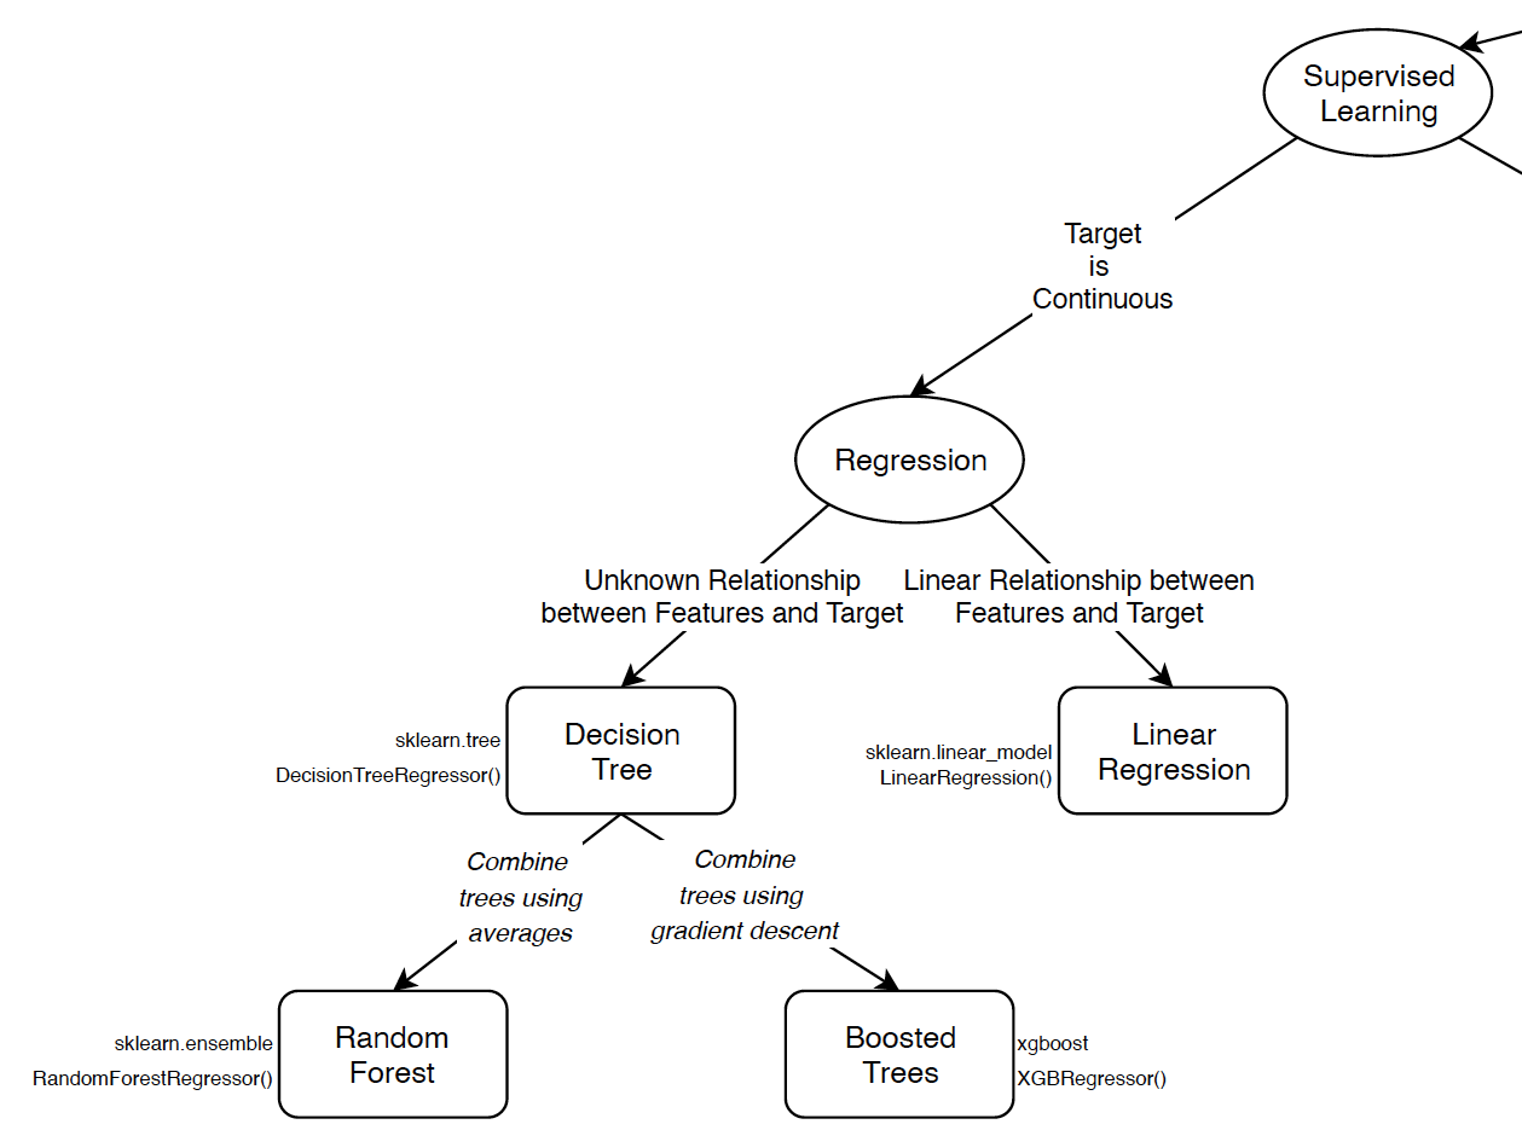

<< WHITEBOARD

utexas_ds_orie_divider_gray.png